# ML_FeatureEngineering
### 타이타닉 생존율 예측

In [2]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
new = pd.read_csv("test.csv")
new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

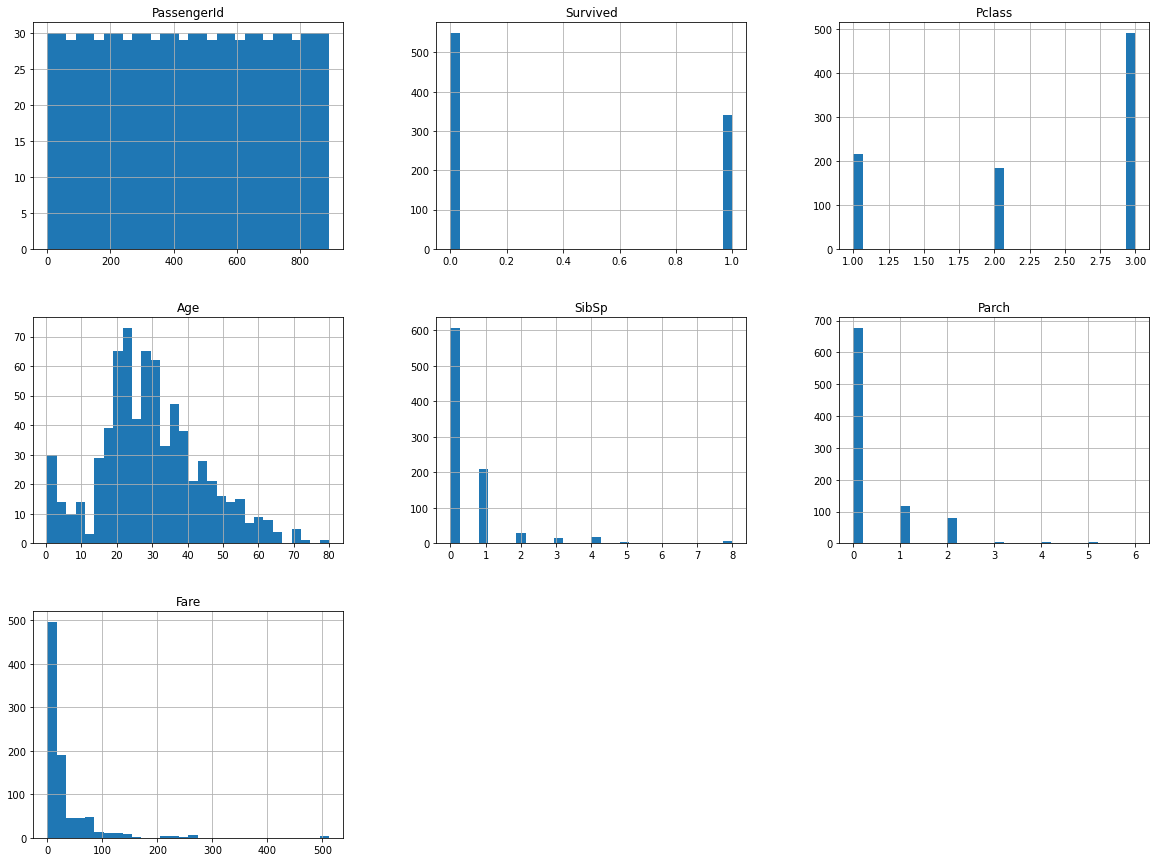

In [12]:
df.hist(bins=30, figsize=(20,15))

In [13]:
display(df.shape) 
display(new.shape)

(891, 12)

(418, 11)

In [15]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [42]:
mdf = df.copy()

In [50]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
mdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
obj=['Name','Sex','Ticket','Cabin','Embarked'] 

In [52]:
mdf['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [54]:
print(mdf['Name'].astype('category').cat.categories)

Index(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       ...
       'Yrois, Miss. Henriette ("Mrs Harbeck")', 'Zabour, Miss. Hileni',
       'Zabour, Miss. Thamine', 'Zimmerman, Mr. Leo',
       'de Messemaeker, Mrs. Guillaume Joseph (Emma)',
       'de Mulder, Mr. Theodore', 'de Pelsmaeker, Mr. Alfons',
       'del Carlo, Mr. Sebastiano', 'van Billiard, Mr. Austin Blyler',
       'van Melkebeke, Mr. Philemon'],
      dtype='object', length=891)


In [55]:
mdf_imp = mdf
mdf_imp[obj]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [56]:
mdf_imp[obj] = mdf_imp[obj].apply(lambda x: x.astype('category').cat.codes) 
mdf_imp[obj].head()

,Name,Sex,Ticket,Cabin,Embarked
0,108,1,523,-1,2
1,190,0,596,81,0
2,353,0,669,-1,2
3,272,0,49,55,2
4,15,1,472,-1,2


In [58]:
mdf_imp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int16
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Cabin            int16
Embarked          int8
dtype: object

In [59]:
mdf_imp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [60]:
from sklearn.impute import SimpleImputer

In [61]:
mdf_imp = SimpleImputer(missing_values=np.nan, strategy='median')

<div>
- strategy="mean": 평균 대체 <br/>
- strategy="median": 중위수 대체 <br/>
- strategy="most_frequent":최빈값 대체 <br/>
</div>

In [62]:
mdf_imp.fit(mdf)

SimpleImputer(strategy='median')

In [63]:
mdf_imp.transform(mdf)

array([[  1.    ,   0.    ,   3.    , ...,   7.25  ,  -1.    ,   2.    ],
       [  2.    ,   1.    ,   1.    , ...,  71.2833,  81.    ,   0.    ],
       [  3.    ,   1.    ,   3.    , ...,   7.925 ,  -1.    ,   2.    ],
       ...,
       [889.    ,   0.    ,   3.    , ...,  23.45  ,  -1.    ,   2.    ],
       [890.    ,   1.    ,   1.    , ...,  30.    ,  60.    ,   0.    ],
       [891.    ,   0.    ,   3.    , ...,   7.75  ,  -1.    ,   1.    ]])

In [64]:
x = mdf_imp.transform(mdf)
x

array([[  1.    ,   0.    ,   3.    , ...,   7.25  ,  -1.    ,   2.    ],
       [  2.    ,   1.    ,   1.    , ...,  71.2833,  81.    ,   0.    ],
       [  3.    ,   1.    ,   3.    , ...,   7.925 ,  -1.    ,   2.    ],
       ...,
       [889.    ,   0.    ,   3.    , ...,  23.45  ,  -1.    ,   2.    ],
       [890.    ,   1.    ,   1.    , ...,  30.    ,  60.    ,   0.    ],
       [891.    ,   0.    ,   3.    , ...,   7.75  ,  -1.    ,   1.    ]])

In [66]:
mdf_imp = pd.DataFrame(x, columns=mdf.columns, index=mdf.index)
mdf_imp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,-1.0,2.0
1,2.0,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0
2,3.0,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,-1.0,2.0
3,4.0,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0
4,5.0,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,-1.0,2.0


In [67]:
mdf_imp.shape

(891, 12)

In [68]:
mdf_imp.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Name           float64
Sex            float64
Age            float64
SibSp          float64
Parch          float64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object

In [69]:
mdf_imp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [70]:
mdf_imp = mdf_imp.astype(int)
mdf_imp.dtypes

PassengerId    int32
Survived       int32
Pclass         int32
Name           int32
Sex            int32
Age            int32
SibSp          int32
Parch          int32
Ticket         int32
Fare           int32
Cabin          int32
Embarked       int32
dtype: object

In [71]:
mdf_imp = mdf_imp.drop(['Name', 'Age'], axis=1)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(mdf_imp)

MinMaxScaler()

In [73]:
x = scaler.transform(mdf_imp)
mdf_imp_s = pd.DataFrame(x, columns=mdf_imp.columns)

In [74]:
mdf_imp_s.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.647587,0.065376,0.063599,0.497836,0.062081,0.119929,0.843247
std,0.289162,0.486592,0.418036,0.477990,0.137843,0.134343,0.295369,0.097078,0.259458,0.266751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.000000,0.000000,0.000000,0.233088,0.013672,0.000000,0.666667
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.495588,0.027344,0.000000,1.000000
75%,0.750000,1.000000,1.000000,1.000000,0.125000,0.000000,0.763971,0.060547,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(mdf_imp)
x = scaler.transform(mdf_imp)
mdf_imp_s = pd.DataFrame(x, columns=mdf_imp.columns)

In [77]:
mdf_imp_s.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.517004e-17,-2.287732e-16,-2.031048e-16,-4.059603e-16,3.456519e-16,6.716164e-17,4.859562e-17,1.812990e-17,3.949952e-17,5.146152e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-7.892723e-01,-1.566107e+00,-1.355574e+00,-4.745452e-01,-4.736736e-01,-1.686421e+00,-6.398612e-01,-4.624902e-01,-3.162949e+00
25%,-8.650540e-01,-7.892723e-01,-3.693648e-01,-1.355574e+00,-4.745452e-01,-4.736736e-01,-8.968342e-01,-4.989476e-01,-4.624902e-01,-6.623389e-01
50%,0.000000e+00,-7.892723e-01,8.273772e-01,7.376951e-01,-4.745452e-01,-4.736736e-01,-7.615002e-03,-3.580340e-01,-4.624902e-01,5.879661e-01
75%,8.650540e-01,1.266990e+00,8.273772e-01,7.376951e-01,4.327934e-01,-4.736736e-01,9.015306e-01,-1.581522e-02,-4.624902e-01,5.879661e-01
max,1.730108e+00,1.266990e+00,8.273772e-01,7.376951e-01,6.784163e+00,6.974147e+00,1.701081e+00,9.666962e+00,3.393862e+00,5.879661e-01


In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)  

In [79]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train).score(X_test, y_test)

0.9440559440559441

In [80]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
# Scaling training and test data the same way
#X_test_scaled = scaler.fit(X_test).transform(X_test)
X_test_scaled = scaler.transform(X_test) 
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.965034965034965

In [81]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.958041958041958